In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
from scipy.special import factorial
import plotly.graph_objects as go
import random
from scipy.stats import chisquare

## Spinning wheel

I analyze the data coming from the spinning wheel case (from the previous year). In particular i focus on the first try "Part_0"

In [2]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Spinning_wheel/Part_0_old.txt')

df_old0 = pd.read_csv(path_spin, sep=',', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [3]:
init_time = df_old0.Time_Tag[0]
df_old0.Time_Tag = df_old0.Time_Tag - init_time

In [ ]:
df_old0.head()

Time_Tag  Channel
0         0        1
1     41154        1
2    279285        1
3    620055        1
4    996799        1

In [5]:
diffs_old0 = []

for i in range(1,len(df_old0.Time_Tag)):
    diff = df_old0.Time_Tag[i] - df_old0.Time_Tag[i-1]
    diffs_old0.append(diff)

In [6]:
hv_old0, xv_old0 = np.histogram(diffs_old0, bins=3000)

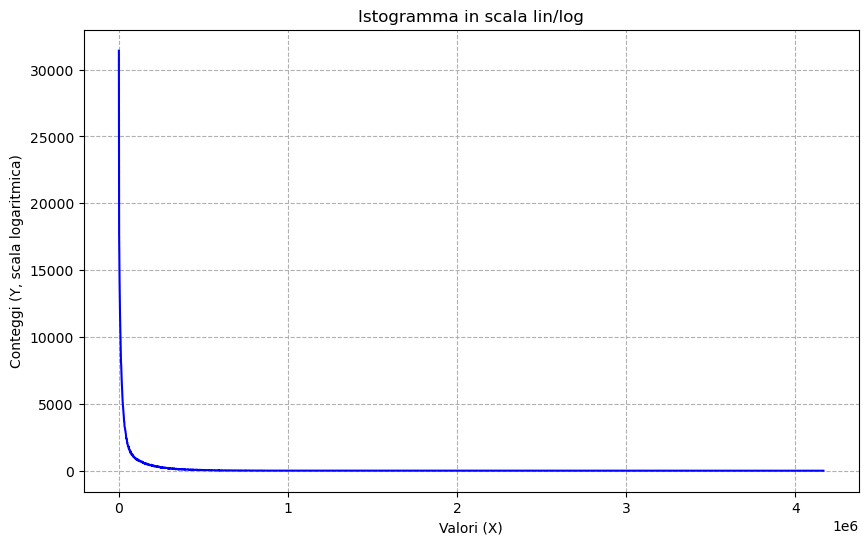

In [7]:
xv_centers_old0 = (xv_old0[:-1] + xv_old0[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers_old0, hv_old0, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

In [8]:
xv_centers_old0[:10]

array([ 1039.297,  2427.891,  3816.485,  5205.079,  6593.673,  7982.267,
        9370.861, 10759.455, 12148.049, 13536.643])

In [9]:
hv_old0[:20]

array([31409, 17733, 15406, 14076, 12448, 11540, 10613,  9608,  8799,
        8133,  7845,  7203,  6749,  6318,  5956,  5516,  5183,  4925,
        4637,  4421])

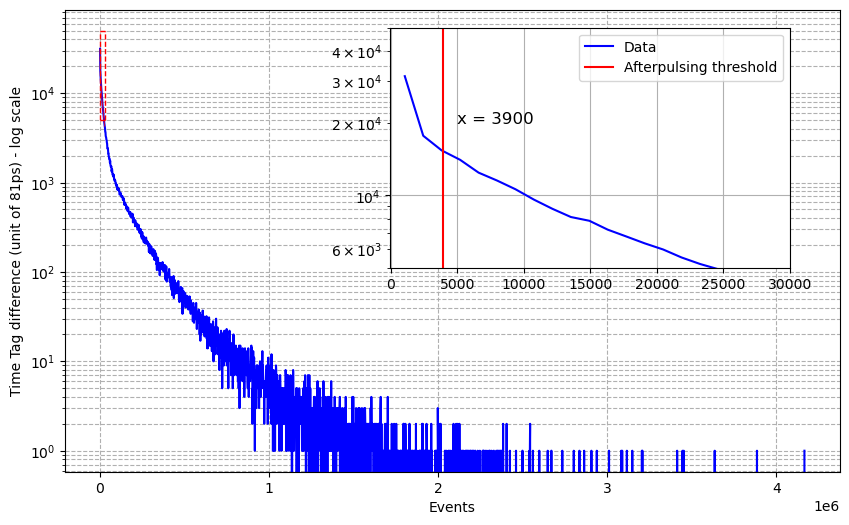

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot principale
ax.semilogy(xv_centers_old0, hv_old0, linestyle='-', color='b', label='Data lin/log')
ax.grid(True, which="both", ls="--")
# ax.set_title("Istogramma in scala lin/log - Afterpulsing thresold")
ax.set_xlabel("Events")
ax.set_ylabel("Time Tag difference (unit of 81ps) - log scale")
ax.grid(True, which="both", ls="--")

# Riquadro di zoom
zoom_factor = 0.1  # fattore di zoom
x_zoom_range = (-100, 30000) # intervallo di zoom sull'asse x

# Calcola il range sull'asse y in base al fattore di zoom
y_range_zoom = (5000, 50000) # intervallo di zoom sull'asse x

# Disegna il riquadro di zoom
ax_zoom = fig.add_axes([0.45, 0.45, 0.4, 0.4])  # specifica la posizione e le dimensioni del riquadro di zoom
ax_zoom.semilogy(xv_centers_old0, hv_old0, linestyle='-', color='b', label='Data')
ax_zoom.axvline(x=3900, color = 'red', label='Afterpulsing threshold')
ax_zoom.set_xlim(x_zoom_range)
ax_zoom.set_ylim(y_range_zoom)
ax_zoom.text(5000, 2e4, f'x = 3900', fontsize=12, color='black')
ax_zoom.legend()
ax_zoom.grid(True)

x_start, x_end = x_zoom_range
y_start, y_end = y_range_zoom

# Linee verticali
ax.vlines(x_start, y_start, y_end, colors='red', linestyles='dashed', linewidth=1)
ax.vlines(x_end, y_start, y_end, colors='red', linestyles='dashed', linewidth=1)

# Linee orizzontali
ax.hlines(y_start, x_start, x_end, colors='red', linestyles='dashed', linewidth=1)
ax.hlines(y_end, x_start, x_end, colors='red', linestyles='dashed', linewidth=1)

# Linee di collegamento
ax.plot([x_start, x_start], [y_start, y_range_zoom[0]], color='red', linestyle='dashed', linewidth=1)
ax.plot([x_end, x_end], [y_start, y_range_zoom[0]], color='red', linestyle='dashed', linewidth=1)

mask = (xv_centers_old0 >= x_start) & (xv_centers_old0 <= x_end)
ax.semilogy(xv_centers_old0[mask], hv_old0[mask], color="red", linewidth=0.5)

# ax_zoom.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

plt.show()

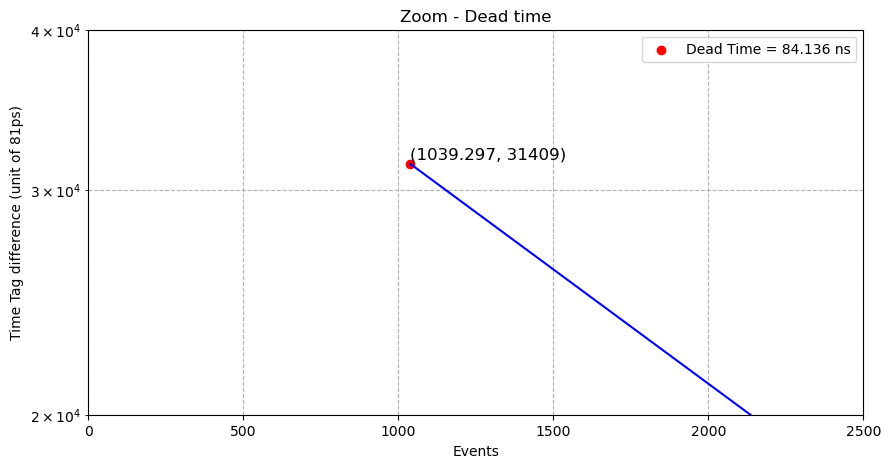

In [11]:
plt.figure(figsize=(10, 5))
plt.semilogy(xv_centers_old0, hv_old0, linestyle='-', color='b') 
plt.axvline(x=80000, color='red')
plt.scatter(xv_centers_old0[0], hv_old0[0], color='red', label=f'Dead Time = {xv_centers_old0[0]*80.955*1e-3:.3f} ns')

# Aggiungere un'etichetta con le coordinate
plt.text(xv_centers_old0[0], hv_old0[0] + 300, f'({xv_centers_old0[0]}, {hv_old0[0]})', fontsize=12, color='black')

plt.title("Zoom - Dead time")
plt.xlabel("Events")
plt.ylabel("Time Tag difference (unit of 81ps)")
plt.xlim(0,2500)
plt.ylim(2e4, 4e4)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [12]:
xv_centers_old0[:19]

array([ 1039.297,  2427.891,  3816.485,  5205.079,  6593.673,  7982.267,
        9370.861, 10759.455, 12148.049, 13536.643, 14925.237, 16313.831,
       17702.425, 19091.019, 20479.613, 21868.207, 23256.801, 24645.395,
       26033.989])

In [13]:
hv_old0[:19]

array([31409, 17733, 15406, 14076, 12448, 11540, 10613,  9608,  8799,
        8133,  7845,  7203,  6749,  6318,  5956,  5516,  5183,  4925,
        4637])

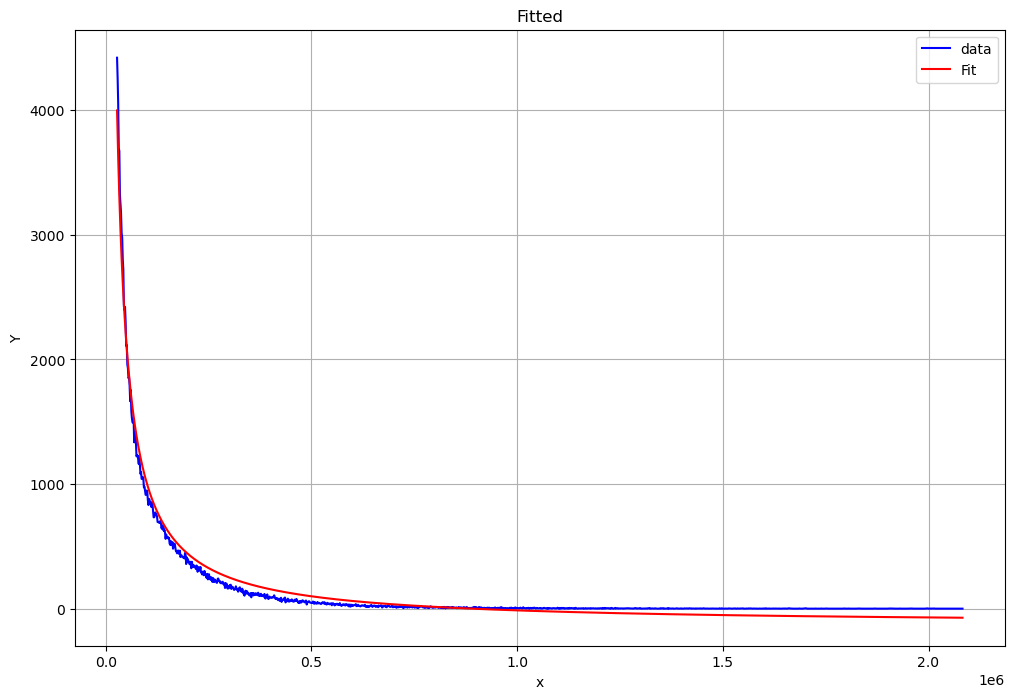

In [14]:
## fitto con la bose einstein
def bose_einstein_func(x, ampl, c):
    return 1/(np.exp(x/c) - 1) + ampl


hv_new = hv_old0[19:(int(len(hv_old0)/2))]
xv_centers_old0_new = xv_centers_old0[19:(int(len(hv_old0)/2))]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_old0_new = xv_centers_old0_new[mask]

popt_old0, pcov_old0 = curve_fit(bose_einstein_func, xv_centers_old0_new, hv_new, p0=[1000, 5000000])

fit_old0 = bose_einstein_func(xv_centers_old0_new, *popt_old0)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_old0_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_old0_new, fit_old0, color= 'red', label='Fit')
plt.xlabel('x')
plt.ylabel('Y')
plt.title('Fitted')
plt.legend()
plt.grid()
plt.show()

In [15]:
ampl_old0, tau_old0 = popt_old0
errors_old0 = np.sqrt(np.diag(pcov_old0))

print(f"Ampl = {ampl_old0:.3f} +/- {errors_old0[0]:.3f}, tau = {tau_old0:.3f} +/- {errors_old0[1]:.3f}", '\n')
print(f"Relative error ampl = {np.abs((errors_old0[0]/ampl_old0)*100):.3f}%; Relative error tau = {(errors_old0[1]/tau_old0)*100:.3f}%")


Ampl = -125.624 +/- 1.983, tau = 113101117.240 +/- 421475.374 

Relative error ampl = 1.578%; Relative error tau = 0.373%


In [16]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time_old0 = df_old0["Time_Tag"].iloc[-1]

N_steps_old0 = int(final_time_old0/step_time)
print(N_steps_old0)

239094


In [17]:
bins_old0 = [i * step_time for i in range(N_steps_old0 + 1)] 
counts_old0_spin, _ = np.histogram(df_old0['Time_Tag'], bins=bins_old0) 

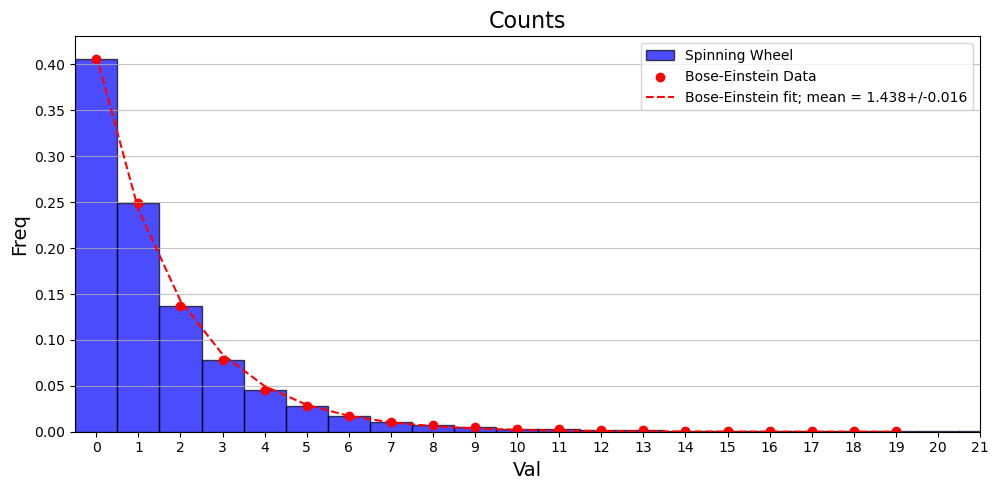

In [18]:
def p_thermal(n, mean_old):
  return (1 / (mean_old + 1)) * (mean_old / (mean_old + 1))**n

bins_old0_spin = np.arange(min(counts_old0_spin) - 0.5, max(counts_old0_spin) + 1.5, 1)

hist_old0_y, bin_edges = np.histogram(counts_old0_spin, bins=bins_old0_spin, density=True)
hist_old0_x = (bin_edges[:-1] + bin_edges[1:]) / 2
hist_old0_y = hist_old0_y[:20]
hist_old0_x = hist_old0_x[:20]

#I perform the fit
popt_old0, pcov_old0 = curve_fit(p_thermal, hist_old0_x, hist_old0_y, p0=[1.0])
mean_old = popt_old0
error_old = np.sqrt(np.diag(pcov_old0))


plt.figure(figsize=(10,5))
plt.hist(counts_old0_spin, bins = bins_old0_spin, density=True, color='blue', edgecolor='black', alpha=0.7, label='Spinning Wheel')
plt.scatter(hist_old0_x, hist_old0_y, label='Bose-Einstein Data', marker='o', color = "red")
plt.plot(hist_old0_x, p_thermal(hist_old0_x, *popt_old0), label=f"Bose-Einstein fit; mean = {mean_old[0]:.3f}+/-{error_old[0]:.3f}", color = "red", linestyle='--')

plt.title('Counts', fontsize=16)
plt.xlabel('Val', fontsize=14)
plt.ylabel('Freq', fontsize=14)

plt.grid(axis='y', alpha=0.75)

plt.xticks(range(min(counts_old0_spin), max(counts_old0_spin) + 1)) 
plt.tight_layout()
plt.xlim(-0.5,21)
plt.legend()
plt.show()

Now I perform a similar analysis for the static wheel, in order to make comparisons

In [19]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_0.txt')

df_stat_1 = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [20]:
init_time = df_stat_1.Time_Tag[0]
df_stat_1.Time_Tag = df_stat_1.Time_Tag - init_time

In [21]:
diffs_stat_1 = []

for i in range(1,len(df_stat_1.Time_Tag)):
    diff = df_stat_1.Time_Tag[i] - df_stat_1.Time_Tag[i-1]
    diffs_stat_1.append(diff)

In [22]:
hv_stat_1, xv_stat_1 = np.histogram(diffs_stat_1, bins=3000)

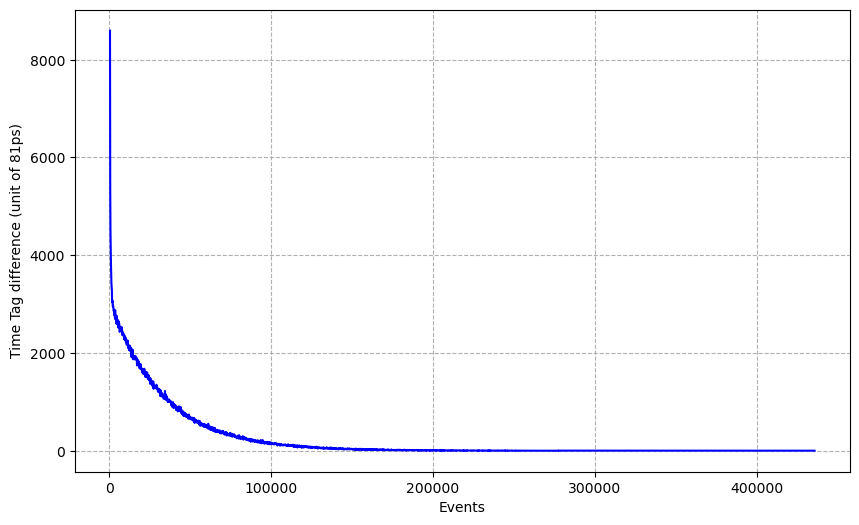

In [23]:
xv_centers_stat_1 = (xv_stat_1[:-1] + xv_stat_1[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers_stat_1, hv_stat_1, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

# plt.title("Istogramma in scala lin/log")
plt.xlabel("Events")
plt.ylabel("Time Tag difference (unit of 81ps)")

plt.show()

In [24]:
xv_centers_stat_1[24]

3914.554333333333

In [25]:
hv_stat_1[24]

2774

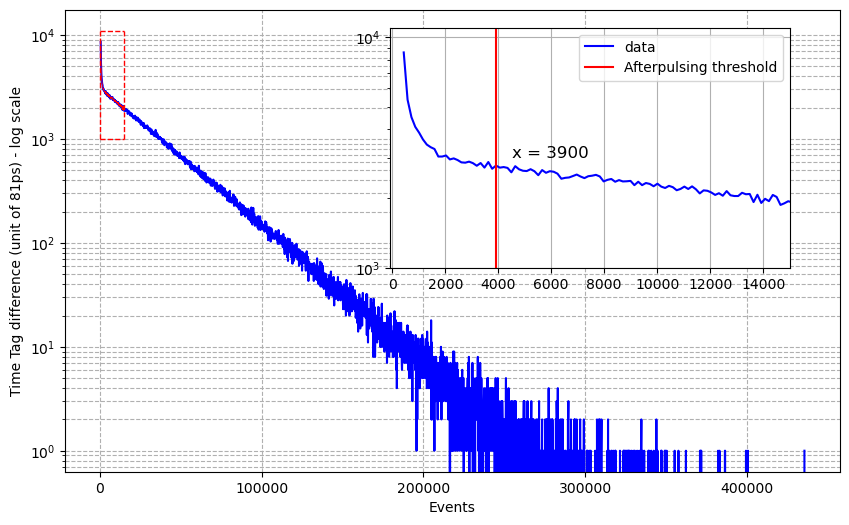

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot principale
ax.semilogy(xv_centers_stat_1, hv_stat_1, linestyle='-', color='b', label='Data lin/log')
ax.grid(True, which="both", ls="--")
# ax.set_title("Istogramma in scala lin/log - Afterpulsing thresold")
ax.set_xlabel("Events")
ax.set_ylabel("Time Tag difference (unit of 81ps) - log scale")
ax.grid(True, which="both", ls="--")

# Riquadro di zoom
zoom_factor = 0.1  # fattore di zoom
x_zoom_range = (-100, 15000) # intervallo di zoom sull'asse x

# Calcola il range sull'asse y in base al fattore di zoom
y_range_zoom = (1000, 11000) # intervallo di zoom sull'asse x

# Disegna il riquadro di zoom
ax_zoom = fig.add_axes([0.45, 0.45, 0.4, 0.4])  # specifica la posizione e le dimensioni del riquadro di zoom
ax_zoom.semilogy(xv_centers_stat_1, hv_stat_1, linestyle='-', color='b', label='data')
ax_zoom.axvline(x=3900, color = 'red', label='Afterpulsing threshold')
ax_zoom.set_xlim(x_zoom_range)
ax_zoom.set_ylim(y_range_zoom)
ax_zoom.text(4500, 3000, f'x = 3900', fontsize=12, color='black')
ax_zoom.legend()
ax_zoom.grid(True)

x_start, x_end = x_zoom_range
y_start, y_end = y_range_zoom

# Linee verticali
ax.vlines(x_start, y_start, y_end, colors='red', linestyles='dashed', linewidth=1)
ax.vlines(x_end, y_start, y_end, colors='red', linestyles='dashed', linewidth=1)

# Linee orizzontali
ax.hlines(y_start, x_start, x_end, colors='red', linestyles='dashed', linewidth=1)
ax.hlines(y_end, x_start, x_end, colors='red', linestyles='dashed', linewidth=1)

# Linee di collegamento
ax.plot([x_start, x_start], [y_start, y_range_zoom[0]], color='red', linestyle='dashed', linewidth=1)
ax.plot([x_end, x_end], [y_start, y_range_zoom[0]], color='red', linestyle='dashed', linewidth=1)

mask = (xv_centers_stat_1 >= x_start) & (xv_centers_stat_1 <= x_end)
ax.semilogy(xv_centers_stat_1[mask], hv_stat_1[mask], color="red", linewidth=0.5)

# ax_zoom.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

plt.show()

In [27]:
xv_centers_stat_1[0]

431.5623333333333

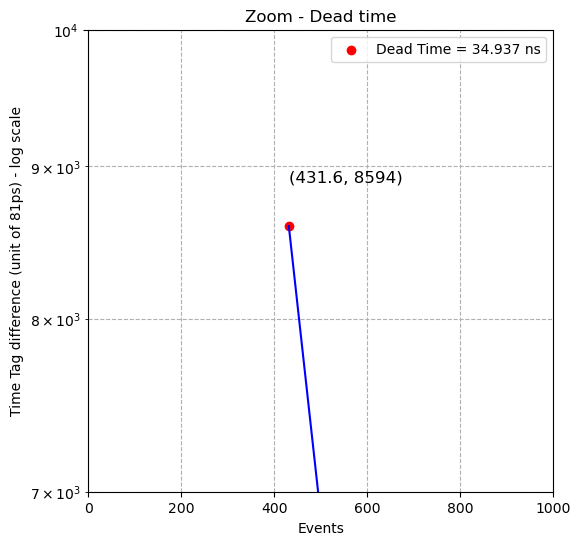

In [28]:
plt.figure(figsize=(6, 6))
plt.semilogy(xv_centers_stat_1, hv_stat_1, linestyle='-', color='b') 
plt.axvline(x=80000, color='red')
plt.scatter(xv_centers_stat_1[0], hv_stat_1[0], color='red', label=f'Dead Time = {xv_centers_stat_1[0]*80.955*1e-3:.3f} ns')

# Aggiungere un'etichetta con le coordinate
plt.text(xv_centers_stat_1[0], hv_stat_1[0] + 300, f'({xv_centers_stat_1[0]:.1f}, {hv_stat_1[0]})', fontsize=12, color='black')

plt.title("Zoom - Dead time")
plt.xlabel("Events")
plt.ylabel("Time Tag difference (unit of 81ps) - log scale")
plt.xlim(0,1000)
plt.ylim(7e3, 1e4)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

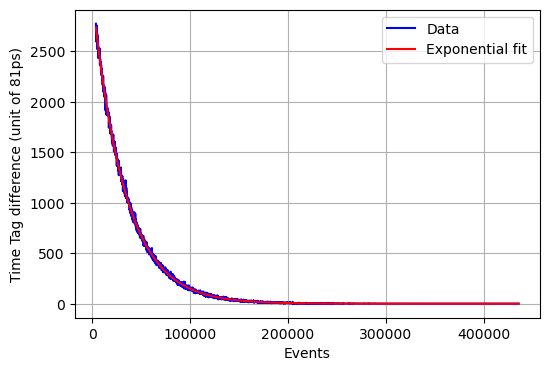

In [29]:
## fitto con la bose einstein
def exp_decr(x, ampl, tau):
    return ampl*np.exp(-x/tau)


hv_new = hv_stat_1[24:]
xv_centers_stat_1_new = xv_centers_stat_1[24:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_stat_1_new = xv_centers_stat_1_new[mask]

popt_stat_1, pcov_stat1 = curve_fit(exp_decr, xv_centers_stat_1_new, hv_new, p0=[2900, 35000])

fit_stat_1 = exp_decr(xv_centers_stat_1_new, *popt_stat_1)

plt.figure(figsize=(6, 4))
plt.plot(xv_centers_stat_1_new, hv_new, linestyle='-', color='b', label='Data') 
plt.plot(xv_centers_stat_1_new, fit_stat_1, color= 'red', label='Exponential fit')
plt.xlabel("Events")
plt.ylabel("Time Tag difference (unit of 81ps)")
plt.legend()
plt.grid()
plt.show()

In [30]:
ampl_stat_1, tau_stat_1 = popt_stat_1
errors_stat_1 = np.sqrt(np.diag(pcov_stat1))

print(f"Ampl = {ampl_stat_1:.3f} +/- {errors_stat_1[0]:.3f}, tau = {tau_stat_1:.3f} +/- {errors_stat_1[1]:.3f}", '\n')
print(f"Relative error ampl = {np.abs((errors_stat_1[0]/ampl_stat_1)*100):.3f}%; Relative error tau = {(errors_stat_1[1]/tau_stat_1)*100:.3f}%")


Ampl = 3079.467 +/- 2.985, tau = 33049.131 +/- 40.364 

Relative error ampl = 0.097%; Relative error tau = 0.122%


In [ ]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df_stat_1["Time_Tag"].iloc[-1]

N_steps_stat_1 = int(final_time/step_time)
print(N_steps_stat_1)

187657


In [32]:
bins_stat_1 = [i * step_time for i in range(N_steps_stat_1 + 1)] 
counts_stat_1, _ = np.histogram(df_stat_1['Time_Tag'], bins=bins_stat_1) 

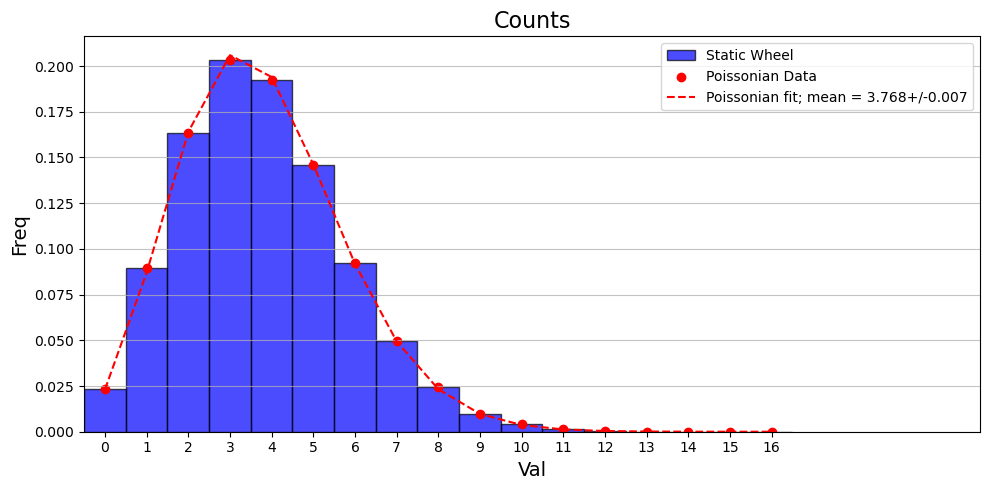

In [33]:
def p_coherent(n, mean_stat_1):
  return ((mean_stat_1**n) * np.exp(-mean_stat_1)) / factorial(n)

bins_stat_1 = np.arange(min(counts_stat_1) - 0.5, max(counts_stat_1) + 1.5, 1)

hist_stat_1_y, bin_edges = np.histogram(counts_stat_1, bins=bins_stat_1, density=True)
hist_stat_1_x = (bin_edges[:-1] + bin_edges[1:]) / 2
# hist_stat_1_y = int(hist_stat_1_y[:20])
# hist_stat_1_x = int(hist_stat_1_x[:20])

#I perform the fit
popt, pcov = curve_fit(p_coherent, hist_stat_1_x, hist_stat_1_y, p0=[1.0])
mean_stat_1 = popt
error_stat_1 = np.sqrt(np.diag(pcov))


plt.figure(figsize=(10,5))
plt.hist(counts_stat_1, bins = bins_stat_1, density=True, color='blue', edgecolor='black', alpha=0.7, label='Static Wheel')
plt.scatter(hist_stat_1_x, hist_stat_1_y, label='Poissonian Data', marker='o', color = "red")
plt.plot(hist_stat_1_x, p_coherent(hist_stat_1_x, *popt), label=f"Poissonian fit; mean = {mean_stat_1[0]:.3f}+/-{error_stat_1[0]:.3f}", color = "red", linestyle='--')

plt.title('Counts', fontsize=16)
plt.xlabel('Val', fontsize=14)
plt.ylabel('Freq', fontsize=14)

plt.grid(axis='y', alpha=0.75)

plt.xticks(range(min(counts_stat_1), max(counts_stat_1) + 1)) 
plt.tight_layout()
plt.xlim(-0.5,21)
plt.legend()
plt.show()

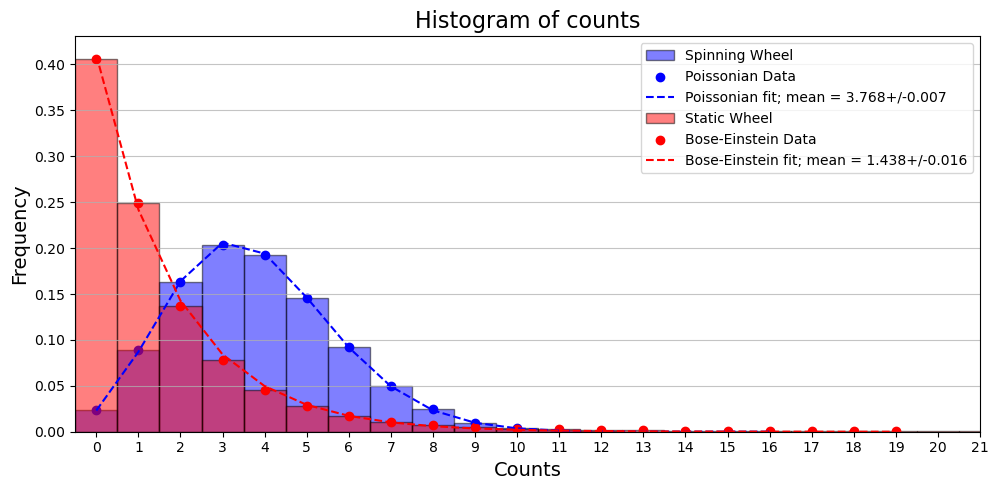

In [34]:
plt.figure(figsize=(10, 5))

# Creazione dell'istogramma per counts_0_spin
plt.hist(counts_stat_1, bins=bins_stat_1, density=True, color='blue', edgecolor='black', alpha=0.5, label='Spinning Wheel')
plt.scatter(hist_stat_1_x, hist_stat_1_y, label='Poissonian Data', marker='o', color = "blue")
plt.plot(hist_stat_1_x, p_coherent(hist_stat_1_x, *popt), label=f"Poissonian fit; mean = {mean_stat_1[0]:.3f}+/-{error_stat_1[0]:.3f}", color = "blue", linestyle='--')


# Creazione dell'istogramma per counts_0_stat
plt.hist(counts_old0_spin, bins=bins_old0_spin, density=True, color='red', edgecolor='black', alpha=0.5, label='Static Wheel')
plt.scatter(hist_old0_x, hist_old0_y, label='Bose-Einstein Data', marker='o', color = "red")
plt.plot(hist_old0_x, p_thermal(hist_old0_x, *popt_old0), label=f"Bose-Einstein fit; mean = {mean_old[0]:.3f}+/-{error_old[0]:.3f}", color = "red", linestyle='--')

# Aggiunta di titolo e etichette
plt.title('Histogram of counts', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Aggiunta della griglia
plt.grid(axis='y', alpha=0.75)

# Aggiunta della legenda
plt.legend()

# Mostra l'istogramma
plt.xticks(range(min(counts_old0_spin), max(counts_old0_spin) + 1)) 
plt.tight_layout()
plt.xlim(-0.5,21)
plt.legend()
plt.show()

## Quantum Random Number Generator

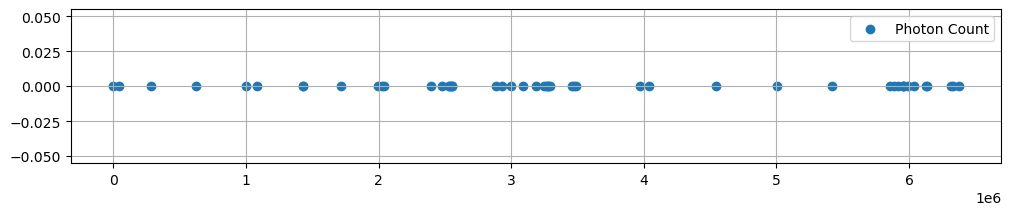

In [35]:
plt.figure(figsize=(12, 2))
plt.scatter(df_old0.Time_Tag[:50], np.zeros(50), label = "Photon Count")
plt.grid()
plt.legend()
plt.show()

In [36]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_0.txt')
df0 = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_1.txt')
df1 = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_2.txt')
df2 = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

df0 = df0.diff()
df1 = df1.diff()
df2 = df2.diff()

In [37]:
df_stat = pd.concat([df0, df1, df2])
df_stat = df_stat[df_stat.Time_Tag > 3900]

data = np.array(df_stat.Time_Tag)

In [38]:
def bits_to_byte(bits):
  byte = 0
  for bit in bits:
    byte = (byte << 1) | bit
  return byte
  
def qrng_list(data):
  bits_list = []
  bytes_list = []
  i = 1
  while i < len(data):
    bits_list.append(int(data[i] > data[i-1]))
    i += 2

  bits_list = np.array(bits_list)
  
  for i in range(0, len(bits_list), 8):
    byte_chunk = bits_list[i:i+8]
    if len(byte_chunk) == 8:
      bytes_list.append(bits_to_byte(byte_chunk))
  
  return bytes_list

In [39]:
bytes_list = qrng_list(data)

with open("random/data/qrng.bin", "wb") as file:
  file.write(bytearray(bytes_list))

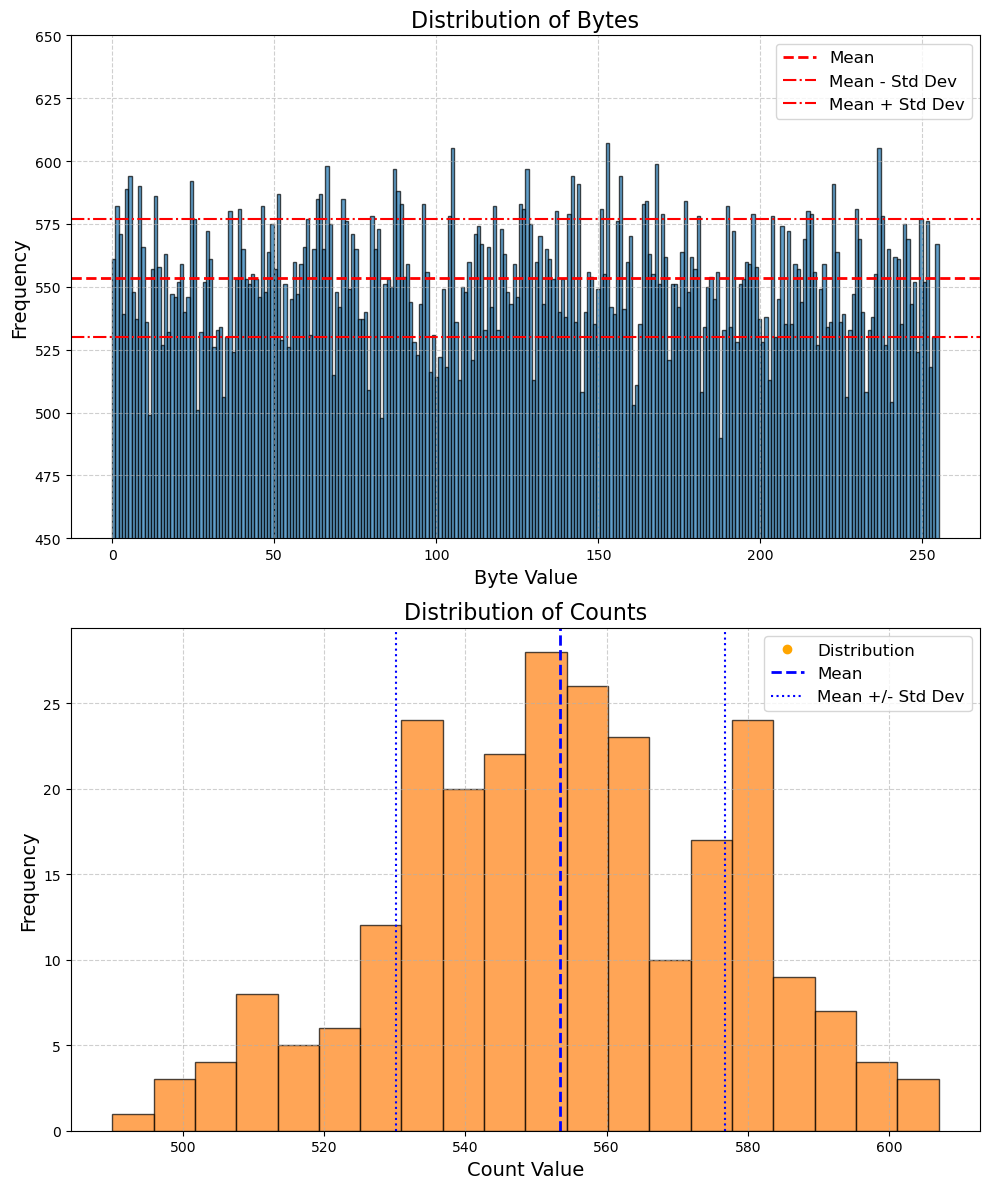

Bytes:
Mean: 127.33, Standard Deviation: 73.85

Counts:
Mean: 553.45, Standard Deviation: 23.34


In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Due righe, una colonna

counts_qrng, bin_edges_qrng, _ = ax1.hist(bytes_list, bins=max(bytes_list)+1, color='#1f77b4', edgecolor='black', alpha=0.7)

# Calcolo della media e deviazione standard
mean_qrng = np.mean(counts_qrng)
std_qrng = np.std(counts_qrng)

# Miglioramenti grafici per il primo subplot
ax1.axhline(y=mean_qrng, color='red', linestyle='--', linewidth=2, label='Mean')
ax1.axhline(y=mean_qrng - std_qrng, color='red', linestyle='-.', linewidth=1.5, label='Mean - Std Dev')
ax1.axhline(y=mean_qrng + std_qrng, color='red', linestyle='-.', linewidth=1.5, label='Mean + Std Dev')

# ax1.axhline(y=mean_qrng - np.sqrt(mean_qrng), color='black', linestyle=':', linewidth=1.5, label='Mean - √Mean')
# ax1.axhline(y=mean_qrng + np.sqrt(mean_qrng), color='black', linestyle=':', linewidth=1.5, label='Mean + √Mean')

# Titoli ed etichette per il primo grafico
ax1.set_title('Distribution of Bytes', fontsize=16)
ax1.set_xlabel('Byte Value', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.legend(loc='upper right', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_ylim(450,650) 

# Secondo grafico
ax2.hist(counts_qrng, bins=20, color='#ff7f0e', edgecolor='black', alpha=0.7)
ax2.set_title('Distribution of Counts', fontsize=16)
ax2.set_xlabel('Count Value', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.6)

# Calcolo statistiche per il secondo grafico
mean_counts = np.mean(counts_qrng)
std_counts = np.std(counts_qrng)
max_count = np.max(counts_qrng)
min_count = np.min(counts_qrng)

# Impostare i limiti sull'asse x per il secondo grafico
# ax2.set_xlim([0, np.max(counts_qrng)])

# Aggiungere statistiche in modo più elegante
statistics_text = (
    r"$\mu$ (Mean): {:.2f}\n"
    r"$\sigma$ (Std Dev): {:.2f}\n"
    r"Min: {}\n"
    r"Max: {}"
).format(mean_counts, std_counts, min_count, max_count)

# Creare una scatola di testo con un riquadro
# stats_box = ax2.text(0.95, 0.95, statistics_text, transform=ax2.transAxes,
#                      fontsize=12, verticalalignment='top', horizontalalignment='right',
#                      bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Aggiungere marcatori colorati per la leggenda
ax2.plot([], [], color='orange', marker='o', linestyle='None', label='Distribution')
ax2.axvline(x=mean_counts, color='blue', linestyle='--', linewidth=2, label='Mean')
ax2.axvline(x=mean_counts + std_counts, color='blue', linestyle=':', linewidth=1.5, label='Mean +/- Std Dev')
ax2.axvline(x=mean_counts - std_counts, color='blue', linestyle=':', linewidth=1.5)

# Aggiungere la leggenda
ax2.legend(loc='upper right', fontsize=12)

# Spaziatura tra i grafici e miglioramento layout
plt.tight_layout()
plt.show()

# Output dei valori calcolati
print(f'Bytes:\nMean: {np.mean(bytes_list):.2f}, Standard Deviation: {np.std(bytes_list):.2f}\n')
print(f'Counts:\nMean: {mean_qrng:.2f}, Standard Deviation: {std_qrng:.2f}')

In [41]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
color_choices = []

x_vals = []
y_vals = []
z_vals = []

k = 0
while k < len(bytes_list) - 2:
  x_vals.append(bytes_list[k])
  y_vals.append(bytes_list[k+1])
  z_vals.append(bytes_list[k+2])
  color_choices.append(random.choice(colors))
  k += 3

fig = go.Figure(data=[go.Scatter3d(x=x_vals, y=y_vals, z=z_vals, mode='markers', marker=dict(size=2, color=color_choices, opacity=0.6))])

fig.update_layout(
  title="Interactive 3D Scatter Plot - QRNG",
  scene=dict(
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    zaxis_title='Z Axis'
  ),
  width=1000, height=1000
)

fig.show()

In [42]:
random_elements = np.random.choice(np.arange(256), size=len(bytes_list), replace=True)

with open("random/data/prng.bin", "wb") as file:
  file.write(bytearray(random_elements))

### Chi-Square Test

QRNG Chi-square Statistic: 251.94
QRNG p-value: 0.5423
The sequence is considered random.
PRNG Chi-square Statistic: 285.43
PRNG p-value: 0.0923
The sequence is 'almost suspect' (10% > p > 5%).


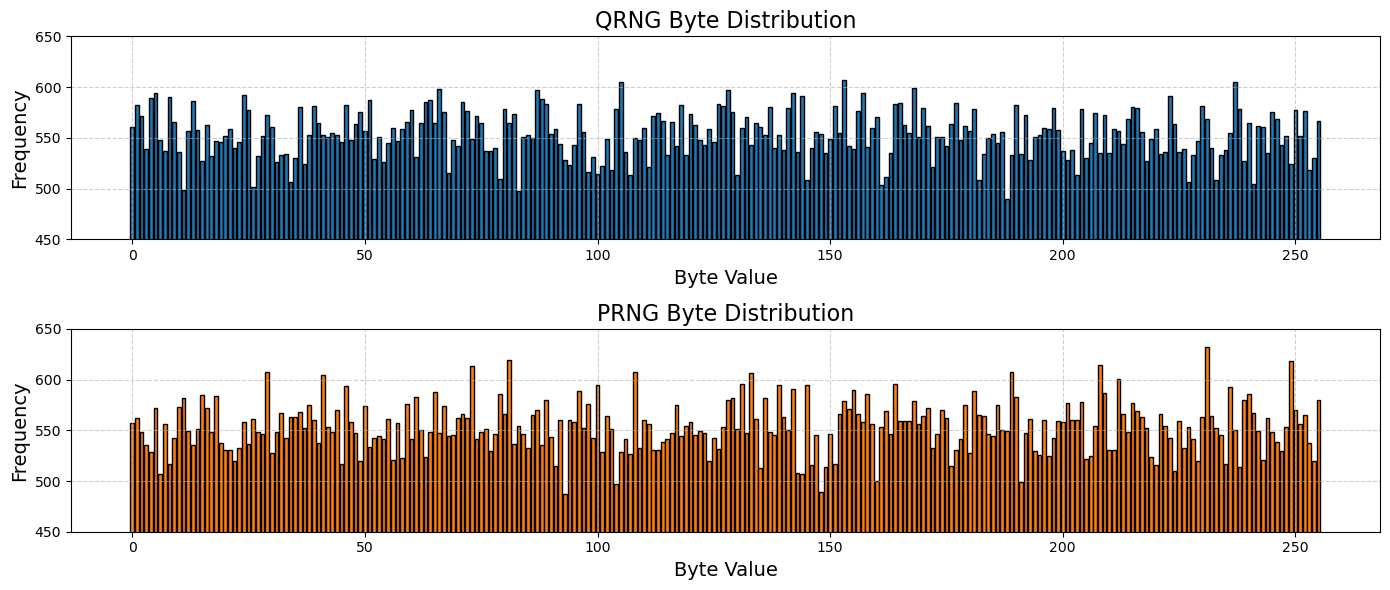

In [43]:
# Generate QRNG bytes
qrng_bytes_list = qrng_list(data)

# Perform the Chi-square test for QRNG
qrng_byte_counts = np.zeros(256, dtype=int)  # For byte values 0-255
for byte in qrng_bytes_list:
    qrng_byte_counts[byte] += 1

qrng_n_samples = len(qrng_bytes_list)
qrng_expected_frequency = qrng_n_samples / 256

# Chi-square test for QRNG
qrng_chi_square_statistic, qrng_p_value = chisquare(qrng_byte_counts)

# Output QRNG test results
print(f'QRNG Chi-square Statistic: {qrng_chi_square_statistic:.2f}')
print(f'QRNG p-value: {qrng_p_value:.4f}')
# print(f"Randomness percentage = {100*(1-qrng_p_value):.3f}")

if qrng_p_value > 0.99:
    print("The sequence is almost certainly not random (p > 0.99).")
elif qrng_p_value < 0.01:
    print("The sequence is almost certainly not random (p < 0.01).")
elif qrng_p_value > 0.95:
    print("The sequence is suspect (99% > p > 95%).")
elif qrng_p_value < 0.05:
    print("The sequence is suspect (5% > p > 1%).")
elif qrng_p_value > 0.90:
    print("The sequence is 'almost suspect' (95% > p > 90%).")
elif qrng_p_value < 0.10:
    print("The sequence is 'almost suspect' (10% > p > 5%).")
else:
    print("The sequence is considered random.")

# -----------------------------------
# PRNG Setup (Pseudo-Random Generator)
# -----------------------------------

def prng_list(n_samples):
    return [random.randint(0, 255) for _ in range(n_samples)]

# Generate PRNG bytes (same number as QRNG for comparison)
prng_bytes_list = prng_list(len(qrng_bytes_list))

# Perform the Chi-square test for PRNG
prng_byte_counts = np.zeros(256, dtype=int)  # For byte values 0-255
for byte in prng_bytes_list:
    prng_byte_counts[byte] += 1

prng_n_samples = len(prng_bytes_list)
prng_expected_frequency = prng_n_samples / 256

# Chi-square test for PRNG
prng_chi_square_statistic, prng_p_value = chisquare(prng_byte_counts)

# Output PRNG test results
print(f'PRNG Chi-square Statistic: {prng_chi_square_statistic:.2f}')
print(f'PRNG p-value: {prng_p_value:.4f}')
# print(f"Randomness percentage = {100*(1-prng_p_value):.3f}")

if prng_p_value > 0.99:
    print("The sequence is almost certainly not random (p > 0.99).")
elif prng_p_value < 0.01:
    print("The sequence is almost certainly not random (p < 0.01).")
elif prng_p_value > 0.95:
    print("The sequence is suspect (99% > p > 95%).")
elif prng_p_value < 0.05:
    print("The sequence is suspect (5% > p > 1%).")
elif prng_p_value > 0.90:
    print("The sequence is 'almost suspect' (95% > p > 90%).")
elif prng_p_value < 0.10:
    print("The sequence is 'almost suspect' (10% > p > 5%).")
else:
    print("The sequence is considered random.")

# -----------------------------------
# Visualization
# -----------------------------------

# QRNG Distribution Plot
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.bar(range(256), qrng_byte_counts, color='#1f77b4', edgecolor='black')
plt.title('QRNG Byte Distribution', fontsize=16)
plt.xlabel('Byte Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(450,650)
plt.grid(True, linestyle='--', alpha=0.6)

# PRNG Distribution Plot
plt.subplot(2, 1, 2)
plt.bar(range(256), prng_byte_counts, color='#ff7f0e', edgecolor='black')
plt.title('PRNG Byte Distribution', fontsize=16)
plt.xlabel('Byte Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(450,650)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Pi-Test

In [44]:
import numpy as np

def monte_carlo_pi(byte_list):
    n_bytes = len(byte_list)
    
    # We need at least 6 bytes to create one (X, Y) pair
    if n_bytes < 6:
        raise ValueError("Not enough bytes to perform the Monte Carlo Pi approximation.")
    
    total_points = 0
    hits = 0
    
    # Loop through byte list in chunks of 6 bytes (24 bits for X and 24 bits for Y)
    for i in range(0, n_bytes - 5, 6):
        # Generate X and Y coordinates from 3 bytes each (24 bits)
        X = (byte_list[i] << 16) | (byte_list[i + 1] << 8) | byte_list[i + 2]
        Y = (byte_list[i + 3] << 16) | (byte_list[i + 4] << 8) | byte_list[i + 5]
        
        # Calculate distance from the origin (0,0) to (X,Y)
        distance = np.sqrt(X**2 + Y**2)
        
        # Check if the point is inside the circle
        max_radius = (2**24 - 1) / 2  # Radius of the circle
        if distance < max_radius:
            hits += 1
        
        total_points += 1
    
    # Estimate Pi
    pi_estimate = 4 * (hits / total_points)
    
    # Calculate error as a percentage
    pi_true = np.pi
    error_percentage = abs((pi_estimate - pi_true) / pi_true) * 100
    
    return pi_estimate, error_percentage

# Test with QRNG bytes
qrng_pi_estimate, qrng_error = monte_carlo_pi(qrng_bytes_list)
print(f'QRNG Monte Carlo Pi Estimate: {qrng_pi_estimate}')
print(f'QRNG Error Percentage: {qrng_error:.4f}%')

# Test with PRNG bytes
prng_pi_estimate, prng_error = monte_carlo_pi(prng_bytes_list)
print(f'PRNG Monte Carlo Pi Estimate: {prng_pi_estimate}')
print(f'PRNG Error Percentage: {prng_error:.4f}%')


QRNG Monte Carlo Pi Estimate: 0.7908867620902854
QRNG Error Percentage: 74.8253%
PRNG Monte Carlo Pi Estimate: 0.7861438129922927
PRNG Error Percentage: 74.9763%


In [45]:
!./ent -b data/qrng.bin

/bin/bash: ./ent: No such file or directory


In [46]:
!./ent -b data/prng.bin

/bin/bash: ./ent: No such file or directory


## WHAT COMES BELOW IS TRASH

Part 1 analysis

In [47]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Spinning_wheel/Part_1.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [48]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [49]:
df.head()

Time_Tag  Channel
0         0        1
1     15039        1
2     88022        1
3    110723        1
4    120495        1

In [50]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

174165


In [51]:
bins = [i * step_time for i in range(N_steps + 1)]  # Crea N_steps + 1 intervalli
counts, _ = np.histogram(df['Time_Tag'], bins=bins)  # Usa np.histogram per contare le occorrenze

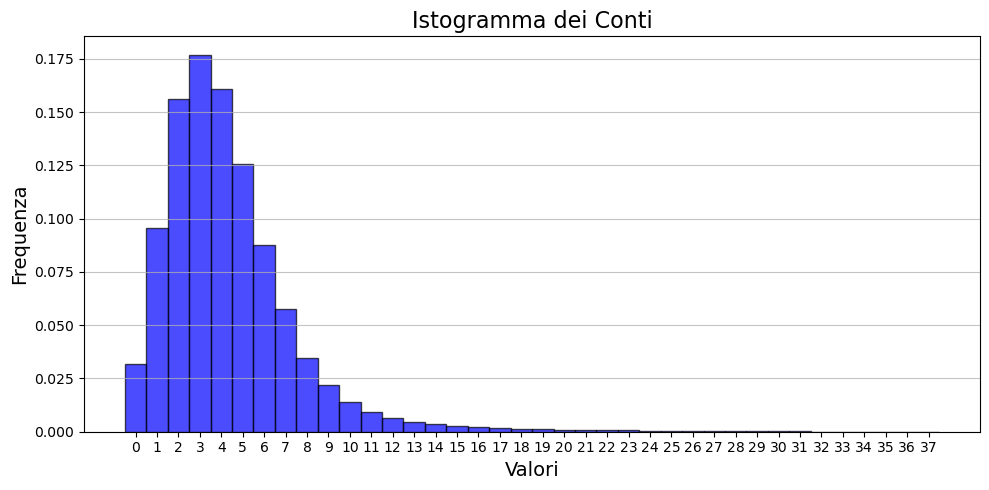

In [52]:
bins = np.arange(min(counts) - 0.5, max(counts) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts, bins = bins, density=True, color='blue', edgecolor='black', alpha=0.7)

# Aggiunta di titolo e etichette
plt.title('Istogramma dei Conti', fontsize=16)
plt.xlabel('Valori', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)

plt.grid(axis='y', alpha=0.75)

# Mostra l'istogramma
plt.xticks(range(min(counts), max(counts) + 1))  # Imposta i tick dell'asse X sui numeri interi
plt.tight_layout()
plt.show()

In [53]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [54]:
hv, xv = np.histogram(diffs, bins=1000)

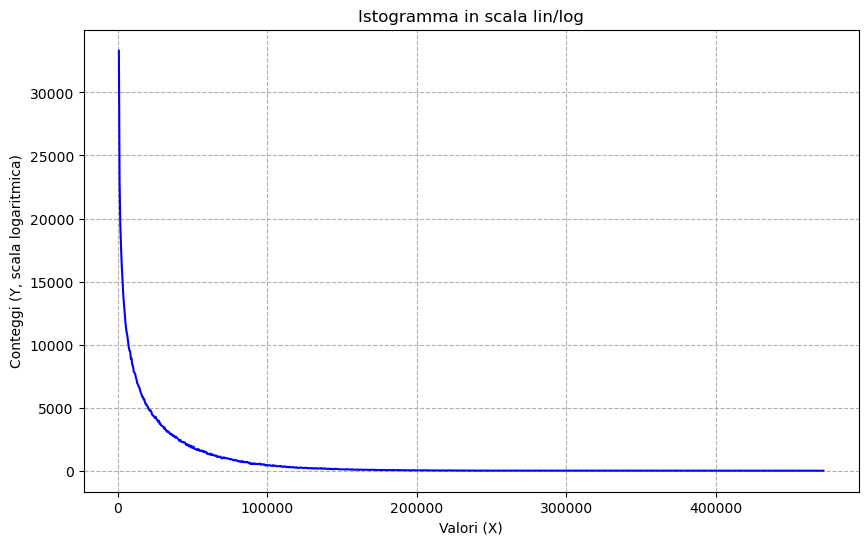

In [55]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

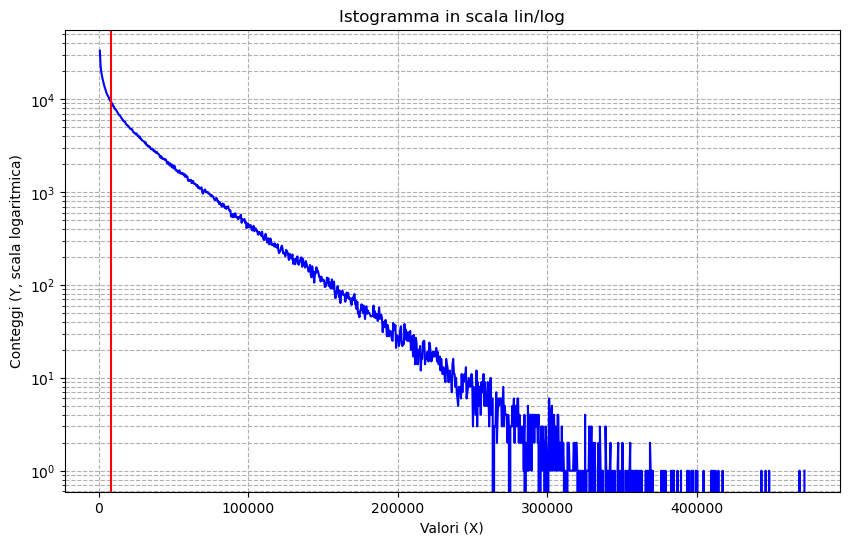

In [56]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=8000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

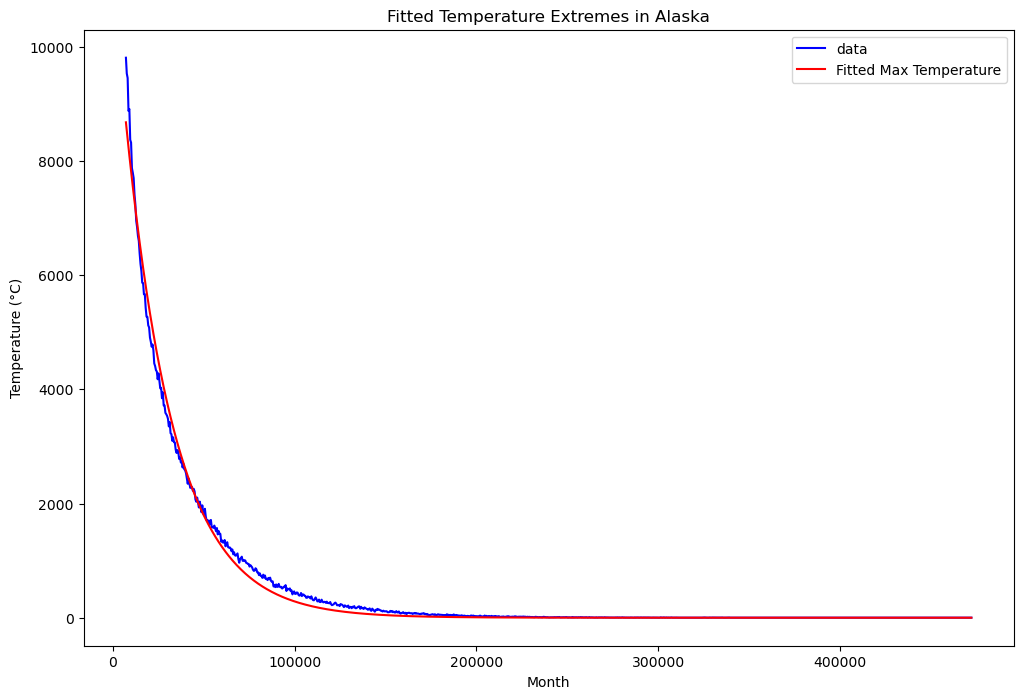

In [57]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[14:]
xv_centers_new = xv_centers[14:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [58]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 11311.476 +/- 60.708, tau = 27164.610 +/- 160.768


Part 2 analysis

In [59]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Spinning_wheel/Part_2.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [60]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [61]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

225332


In [62]:
bins = [i * step_time for i in range(N_steps + 1)]  # Crea N_steps + 1 intervalli
counts, _ = np.histogram(df['Time_Tag'], bins=bins)  # Usa np.histogram per contare le occorrenze

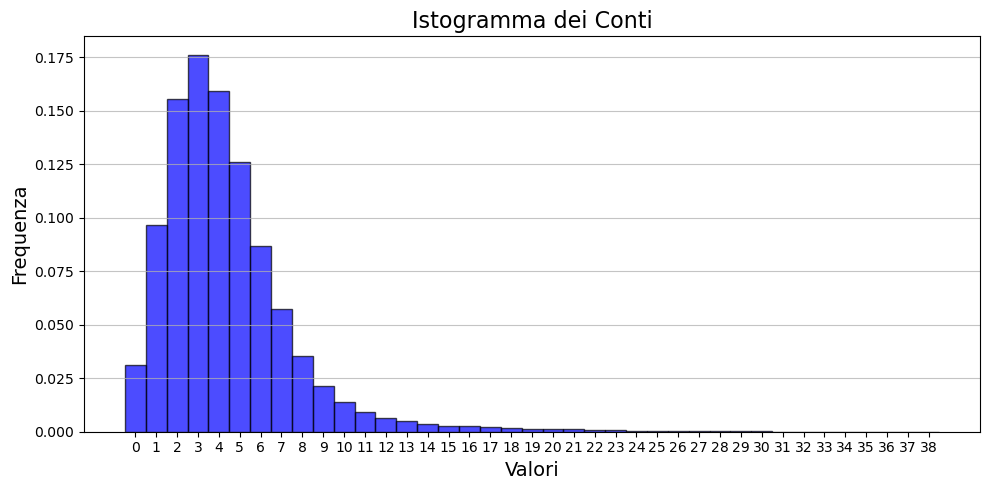

In [63]:
bins = np.arange(min(counts) - 0.5, max(counts) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts, bins = bins, density=True, color='blue', edgecolor='black', alpha=0.7)

# Aggiunta di titolo e etichette
plt.title('Istogramma dei Conti', fontsize=16)
plt.xlabel('Valori', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)

plt.grid(axis='y', alpha=0.75)

# Mostra l'istogramma
plt.xticks(range(min(counts), max(counts) + 1))  # Imposta i tick dell'asse X sui numeri interi
plt.tight_layout()
plt.show()

In [64]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [65]:
hv, xv = np.histogram(diffs, bins=1000)

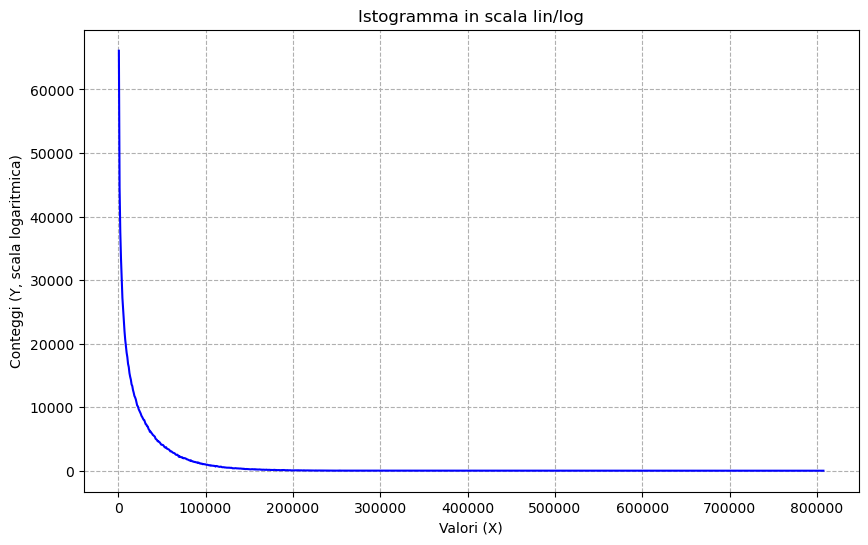

In [66]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

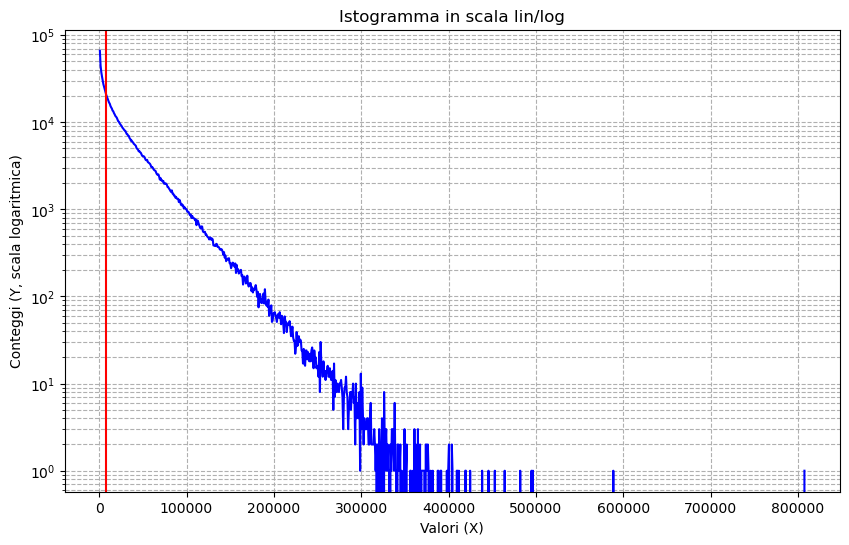

In [67]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=8000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

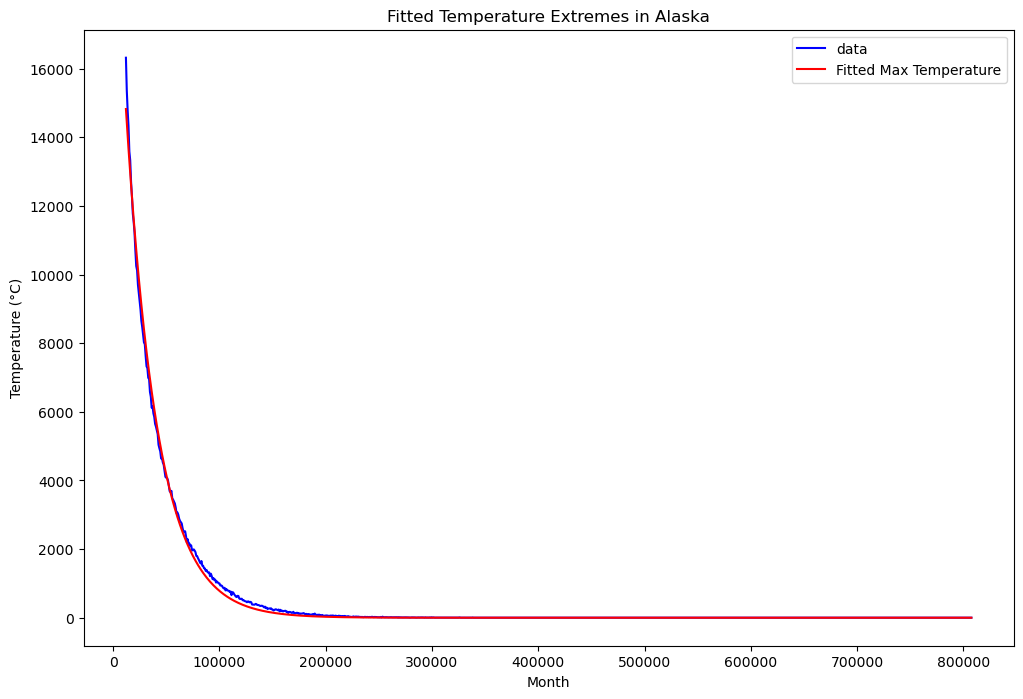

In [68]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[14:]
xv_centers_new = xv_centers[14:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [69]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 22191.034 +/- 111.526, tau = 29904.444 +/- 147.214


## Static wheel

Part 0 analysis

In [70]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_0.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [71]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [72]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

187657


In [73]:
bins = [i * step_time for i in range(N_steps + 1)] 
counts_0_stat, _ = np.histogram(df['Time_Tag'], bins=bins) 

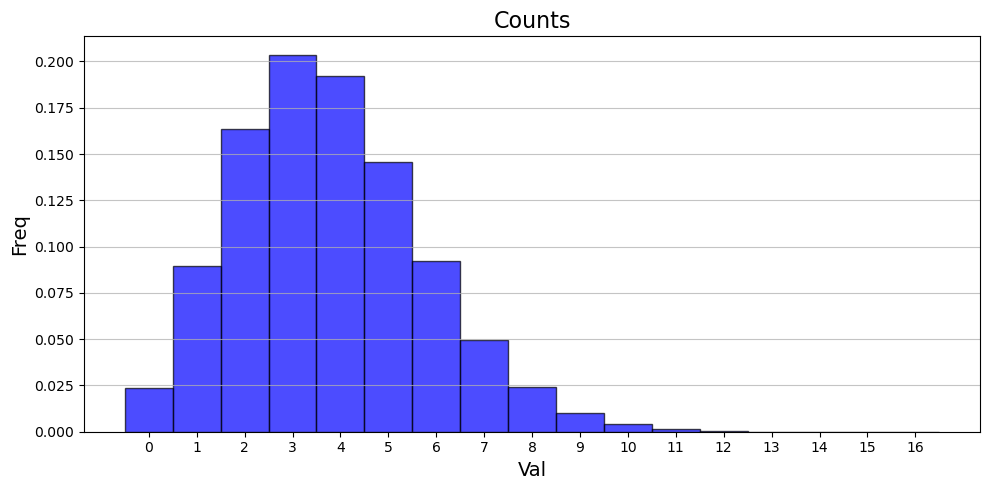

In [74]:
bins_0_stat = np.arange(min(counts_0_stat) - 0.5, max(counts_0_stat) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts_0_stat, bins = bins_0_stat, density=True, color='blue', edgecolor='black', alpha=0.7)

plt.title('Counts', fontsize=16)
plt.xlabel('Val', fontsize=14)
plt.ylabel('Freq', fontsize=14)

plt.grid(axis='y', alpha=0.75)

plt.xticks(range(min(counts_0_stat), max(counts_0_stat) + 1))
plt.tight_layout()
plt.show()

In [75]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [76]:
hv, xv = np.histogram(diffs, bins=1000)

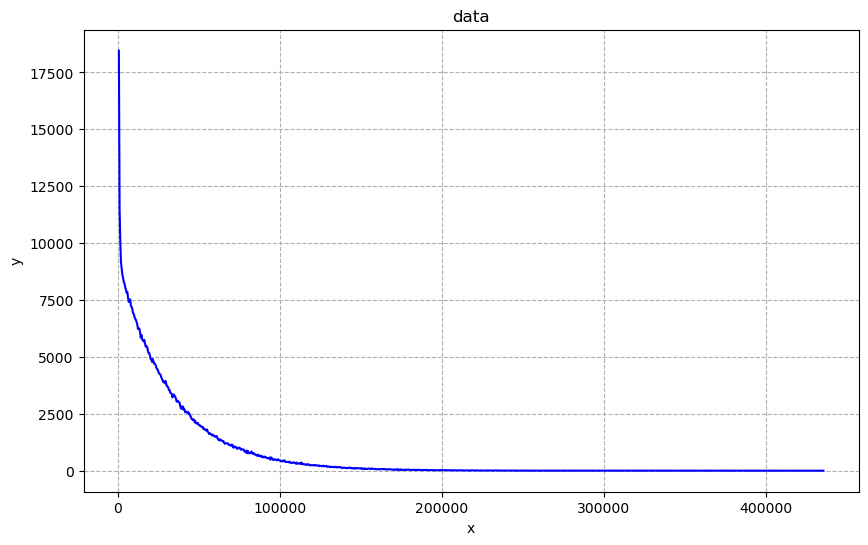

In [77]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("data")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

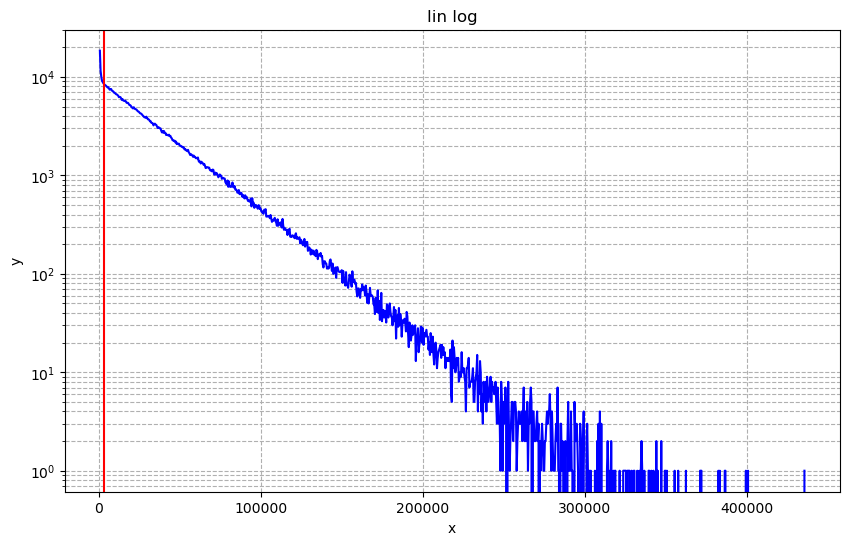

In [78]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=3000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("lin log")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

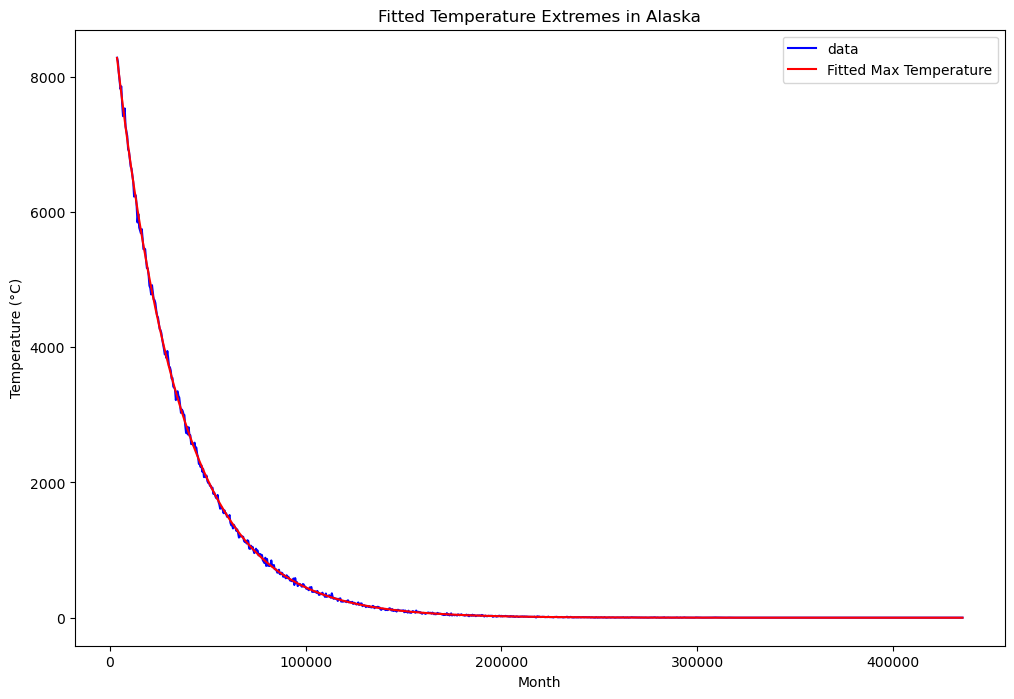

In [79]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[7:]
xv_centers_new = xv_centers[7:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [80]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 9238.332 +/- 7.683, tau = 33049.783 +/- 35.087


In [81]:
plt.figure(figsize=(10, 5))

plt.hist(counts_0_spin, bins=bins_0_spin, density=True, color='blue', edgecolor='black', alpha=0.5, label='Counts 0 Spin')

plt.hist(counts_0_stat, bins=bins_0_stat, density=True, color='red', edgecolor='black', alpha=0.5, label='Counts 0 Stat')

plt.title('Comparison Histogram', fontsize=16)
plt.xlabel('Val', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid(axis='y', alpha=0.75)

plt.legend()

plt.xticks(range(min(min(counts_0_spin), min(counts_0_stat)), max(max(counts_0_spin), max(counts_0_stat)) + 1))
plt.tight_layout()
plt.show()

NameError: name 'counts_0_spin' is not defined

<Figure size 1000x500 with 0 Axes>

Part 1 analysis

In [ ]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_1.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [ ]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [ ]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [ ]:
hv, xv = np.histogram(diffs, bins=1000)

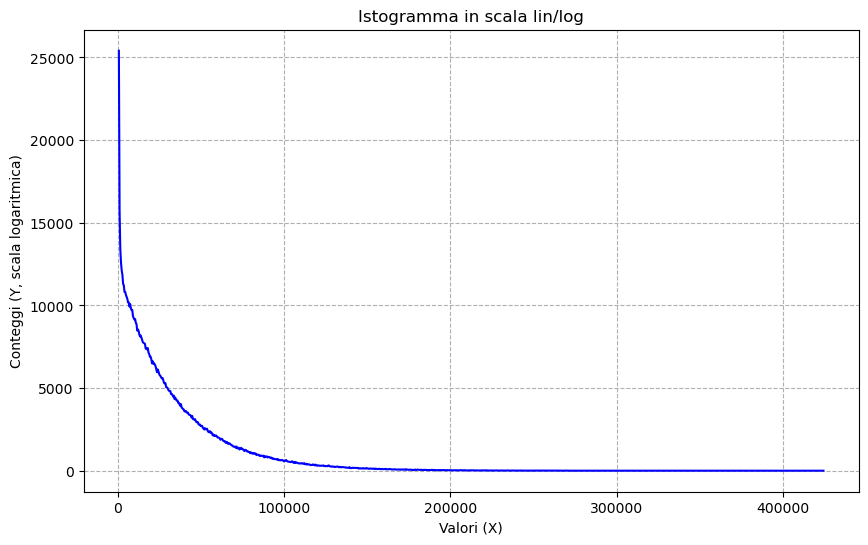

In [ ]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

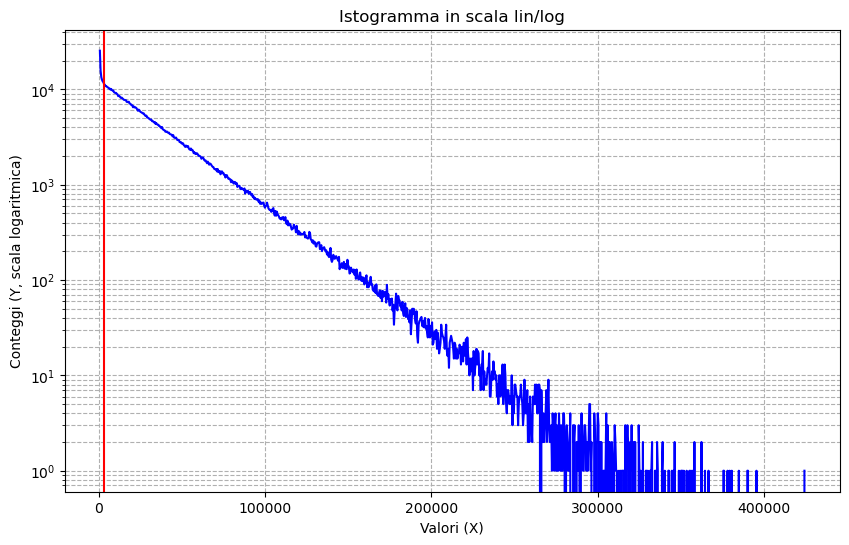

In [ ]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=3000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

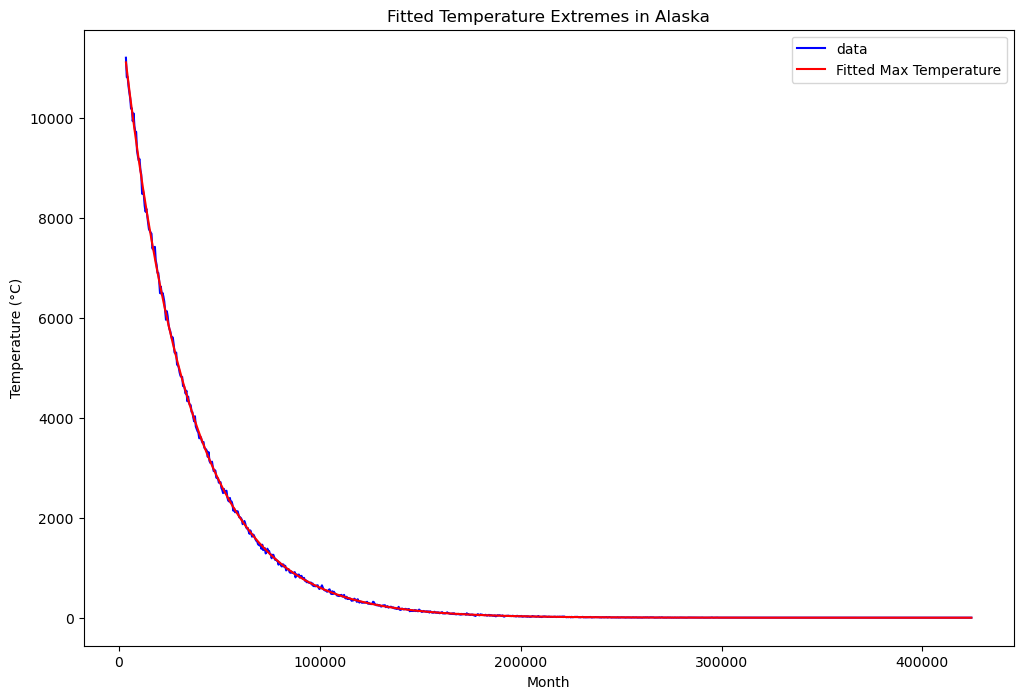

In [ ]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[7:]
xv_centers_new = xv_centers[7:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [ ]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 12358.895 +/- 8.892, tau = 33108.708 +/- 30.483


Part 2 analysis

In [ ]:
path_spin =os.path.abspath('/home/sdruci/Q-OpticsLaser/lab1/Static_wheel/Part_2.txt')

df = pd.read_csv(path_spin, sep=';', header=None, names=['Time_Tag', 'Channel'], skiprows=5)   

In [ ]:
init_time = df.Time_Tag[0]
df.Time_Tag = df.Time_Tag - init_time

In [ ]:
diffs = []

for i in range(1,len(df.Time_Tag)):
    diff = df.Time_Tag[i] - df.Time_Tag[i-1]
    diffs.append(diff)

In [ ]:
hv, xv = np.histogram(diffs, bins=1000)

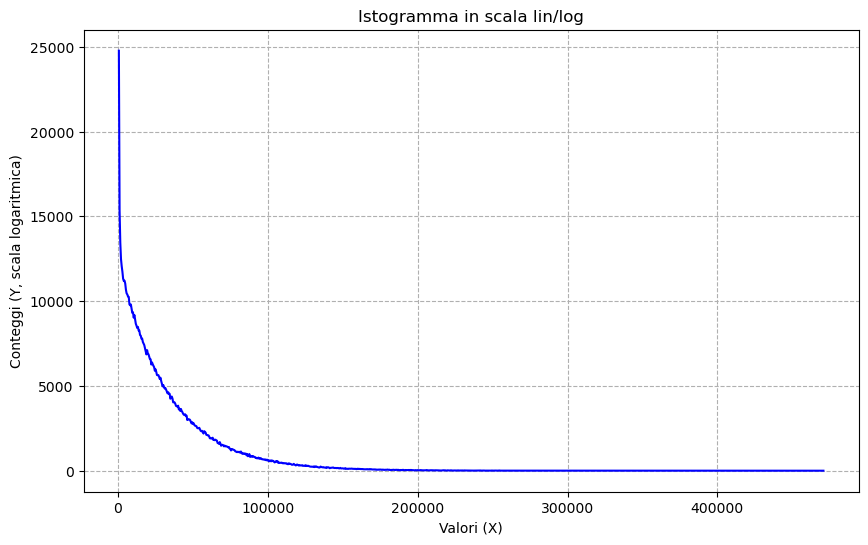

In [ ]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(xv_centers, hv, linestyle='-', color='b') 

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

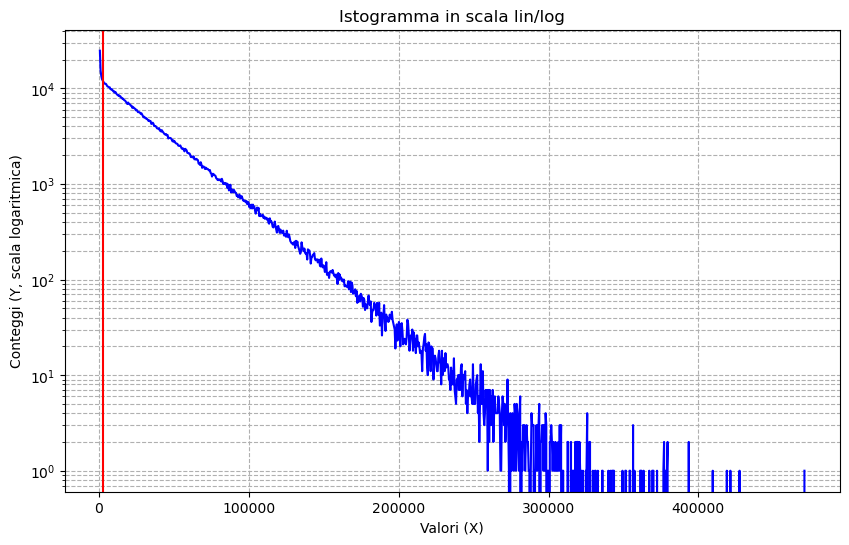

In [ ]:
xv_centers = (xv[:-1] + xv[1:]) / 2

plt.figure(figsize=(10, 6))
plt.semilogy(xv_centers, hv, linestyle='-', color='b') 
plt.axvline(x=3000, color='red')

plt.grid(True, which="both", ls="--")

plt.title("Istogramma in scala lin/log")
plt.xlabel("Valori (X)")
plt.ylabel("Conteggi (Y, scala logaritmica)")

plt.show()

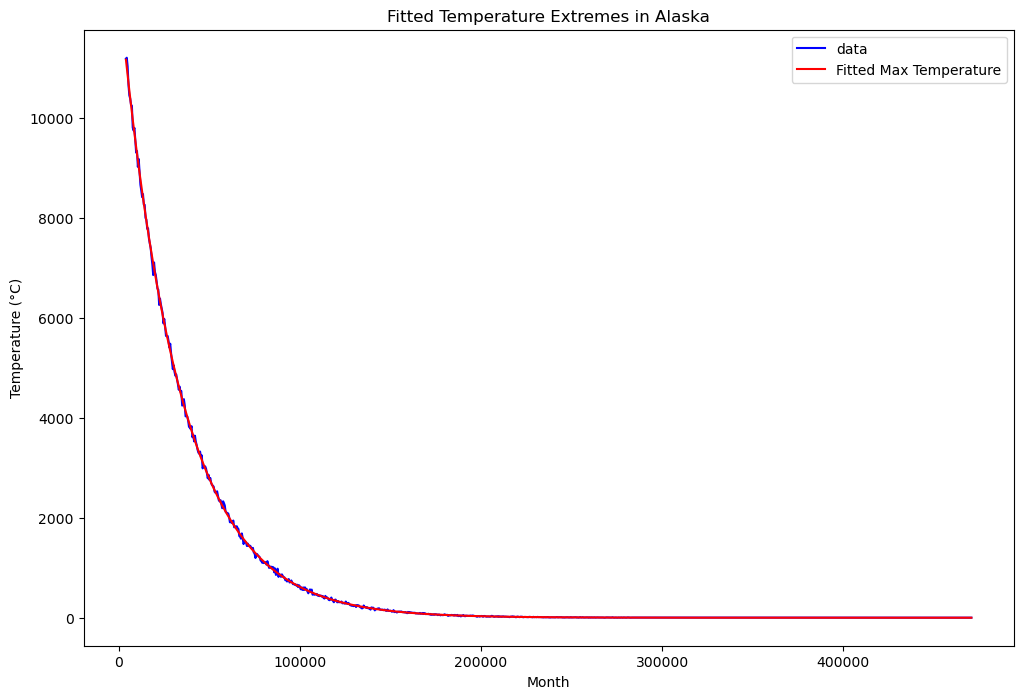

In [ ]:
def temp_function(x, ampl, tau):
    return ampl * np.exp(-x/tau)


hv_new = hv[7:]
xv_centers_new = xv_centers[7:]
mask = hv_new > 0

hv_new = hv_new[mask]
xv_centers_new = xv_centers_new[mask]

popt, pcov = curve_fit(temp_function, xv_centers_new, hv_new, p0=[12184, 23784.837])

fit = temp_function(xv_centers_new, *popt)

plt.figure(figsize=(12,8))
plt.plot(xv_centers_new, hv_new, linestyle='-', color='b', label='data') 
plt.plot(xv_centers_new, fit, color= 'red', label='Fitted Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

In [ ]:
ampl, tau = popt
errors = np.sqrt(np.diag(pcov))

print(f"Ampl = {ampl:.3f} +/- {errors[0]:.3f}, tau = {tau:.3f} +/- {errors[1]:.3f}")

Ampl = 12557.533 +/- 10.380, tau = 33158.687 +/- 34.744


In [ ]:
unit_time = 80.955
step_time = int(10e6/unit_time)

final_time = df["Time_Tag"].iloc[-1]

N_steps = int(final_time/step_time)
print(N_steps)

237732


In [ ]:
bins = [i * step_time for i in range(N_steps + 1)]  # Crea N_steps + 1 intervalli
counts, _ = np.histogram(df['Time_Tag'], bins=bins)  # Usa np.histogram per contare le occorrenze

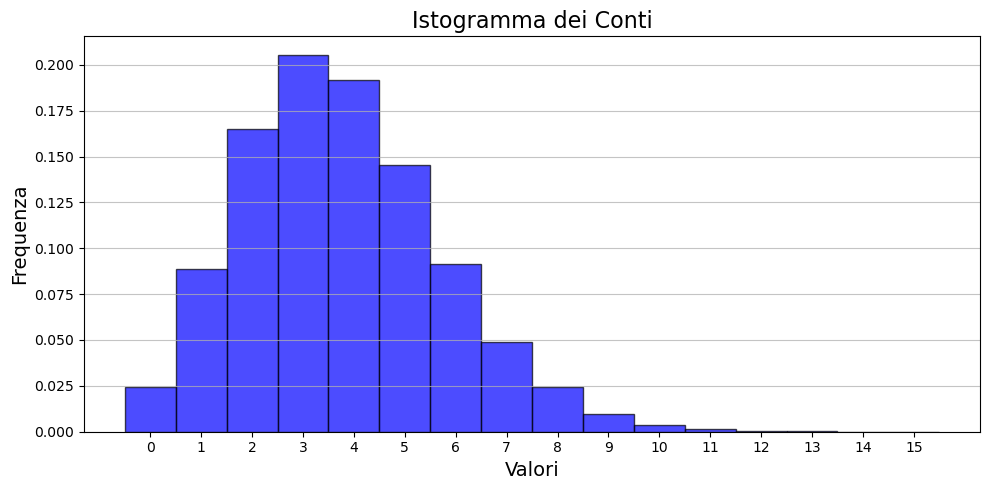

In [ ]:
bins = np.arange(min(counts) - 0.5, max(counts) + 1.5, 1)

plt.figure(figsize=(10,5))
plt.hist(counts, bins = bins, density=True, color='blue', edgecolor='black', alpha=0.7)

# Aggiunta di titolo e etichette
plt.title('Istogramma dei Conti', fontsize=16)
plt.xlabel('Valori', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)

plt.grid(axis='y', alpha=0.75)

# Mostra l'istogramma
plt.xticks(range(min(counts), max(counts) + 1))  # Imposta i tick dell'asse X sui numeri interi
plt.tight_layout()
plt.show()